# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Alperen Demirci 
# Student ID:  2220765010

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import sqlite3

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**ER Diagram**\>

Customers:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| CustomerID     | Primary Key , INT                          |
| CustomerName     | TEXT                         |
| CustomerEmail     | TEXT                         |
| CustomerPhone     | TEXT                        |

Flights:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| FlightID     | Primary Key , REAL                          |
| FlightDeparture     | TEXT                         |
| FlightDestination     | TEXT                         |
| FlightDate     | TEXT                        |
| AirplaneID     | REAL                        |

Hotels:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| HotelID     | Primary Key , REAL                          |
| HotelName     | TEXT                         |
| HotelLocation     | TEXT                         |
| HotelRating     | REAL                        |

Airlines:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| AirlineID     | Primary Key , REAL                          |
| FlightID     | Foreign Key REFERENCES Flights(FlightID), REAL                          |
| AirlineName     | TEXT                         |

Bookings:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| BookingID     | Primary Key , INT                          |
| CustomerID     | Foreign Key REFERENCES Customers(CustomerID), INT                         |
| AirlineID     | Foreign Key REFERENCES Airlines(AirlineID), REAL                        |
| HotelID     | Foreign Key REFERENCES Hotels(HotelID), REAL                         |

Feedbacks:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| FeedbackID     | Primary Key , INT                          |
| CustomerID     | Foreign Key REFERENCES Customers(CustomerID), INT                         |
| AirlineID     | Foreign Key REFERENCES Airlines(AirlineID), REAL                        |
| HotelID     | Foreign Key REFERENCES Hotels(HotelID), REAL                         |
| Review     | TEXT                         |


In [3]:
#Creating a connection to stadmp.db.
conn = sqlite3.connect('stadmp.db')

#Creating a df for transforming csv data to sql table.
df_booking = pd.read_csv('BookingDetails.csv')
df_feedback = pd.read_csv('FeedbackDetails.csv')

#Converting dfs into sql schemas
df_booking.to_sql('booking', conn, if_exists='replace', index=False)
df_feedback.to_sql('feedback', conn, if_exists='replace', index=False)

#Setting c as the connection cursor.
c = conn.cursor()

In [4]:
#First things first we need to see all of the columns for splitting them into different tables.
c.execute("PRAGMA table_info(booking)")
c.fetchall()

[(0, 'BookingID', 'INTEGER', 0, None, 0),
 (1, 'CustomerID', 'INTEGER', 0, None, 0),
 (2, 'CustomerName', 'TEXT', 0, None, 0),
 (3, 'CustomerEmail', 'TEXT', 0, None, 0),
 (4, 'CustomerPhone', 'TEXT', 0, None, 0),
 (5, 'FlightID', 'REAL', 0, None, 0),
 (6, 'Flight_Departure', 'TEXT', 0, None, 0),
 (7, 'Flight_Destination', 'TEXT', 0, None, 0),
 (8, 'Flight_Date', 'TEXT', 0, None, 0),
 (9, 'AirplaneID', 'REAL', 0, None, 0),
 (10, 'AirlineName', 'TEXT', 0, None, 0),
 (11, 'HotelID', 'REAL', 0, None, 0),
 (12, 'HotelName', 'TEXT', 0, None, 0),
 (13, 'HotelLocation', 'TEXT', 0, None, 0),
 (14, 'HotelRating', 'REAL', 0, None, 0),
 (15, 'AirlineID', 'REAL', 0, None, 0)]

Now we have to decide which tables we will create.
  
Tables/Schemas:
  
  1. Customers
  2. Flights
  3. Hotels 
  4. Airlines
  5. Bookings
  6. Feedbacks

In [5]:
#Creating a table for customers which contains the necessary information about customers.

c.execute('''

    CREATE TABLE IF NOT EXISTS Customers
          (
          CustomerID INTEGER,
          CustomerName TEXT,
          CustomerEmail TEXT,
          CustomerPhone TEXT,
          PRIMARY KEY(CustomerID)
          )
''')
c.execute('''PRAGMA table_info(Customers);''')
c.fetchall()

[(0, 'CustomerID', 'INTEGER', 0, None, 1),
 (1, 'CustomerName', 'TEXT', 0, None, 0),
 (2, 'CustomerEmail', 'TEXT', 0, None, 0),
 (3, 'CustomerPhone', 'TEXT', 0, None, 0)]

In [6]:
#Creating a table for hotels which contains the necessary information about hotels.

c.execute('''

    CREATE TABLE IF NOT EXISTS Hotels
          (
          HotelID REAL,
          HotelName TEXT,
          HotelLocation TEXT,
          HotelRating REAL,
          PRIMARY KEY(HotelID)
          )
''')
c.execute('''PRAGMA table_info(Hotels);''')
c.fetchall()

[(0, 'HotelID', 'REAL', 0, None, 1),
 (1, 'HotelName', 'TEXT', 0, None, 0),
 (2, 'HotelLocation', 'TEXT', 0, None, 0),
 (3, 'HotelRating', 'REAL', 0, None, 0)]

In [7]:
#Creating a table for flights which contains the necessary information about flights.

c.execute('''

    CREATE TABLE IF NOT EXISTS Flights
          (
          FlightID REAL,
          Flight_Departure TEXT,
          Flight_Destination TEXT,
          Flight_Date TEXT,
          AirplaneID REAL,
          PRIMARY KEY(FlightID)
          )
''')
c.execute('''PRAGMA table_info(Flights);''')
c.fetchall()

[(0, 'FlightID', 'REAL', 0, None, 1),
 (1, 'Flight_Departure', 'TEXT', 0, None, 0),
 (2, 'Flight_Destination', 'TEXT', 0, None, 0),
 (3, 'Flight_Date', 'TEXT', 0, None, 0),
 (4, 'AirplaneID', 'REAL', 0, None, 0)]

In [8]:
#Creating a table for airlines which contains the necessary information about airlines.

c.execute('''

    CREATE TABLE IF NOT EXISTS Airlines
          (
          AirlineID REAL,
          AirlineName TEXT,
          FlightID TEXT REFERENCES Flights(FlightID),
          PRIMARY KEY(AirlineID,FlightID)
          )
''')
c.execute('''PRAGMA table_info(Airlines);''')
c.fetchall()

[(0, 'AirlineID', 'REAL', 0, None, 1),
 (1, 'AirlineName', 'TEXT', 0, None, 0),
 (2, 'FlightID', 'TEXT', 0, None, 2)]

In [9]:
#Creating a table for reviews which contains the necessary information about reviews.

c.execute('''

    CREATE TABLE IF NOT EXISTS Feedbacks
          (
          FeedbackID INTEGER,
          CustomerID INTEGER REFERENCES Customers(CustomerID),
          AirlineID REAL REFERENCES Airlines(AirlineID),
          HotelID REAL REFERENCES Hotels(HotelID),
          Review TEXT,
          PRIMARY KEY(FeedbackID,CustomerID)
          )
''')
c.execute('''PRAGMA table_info(Feedbacks);''')
c.fetchall()

[(0, 'FeedbackID', 'INTEGER', 0, None, 1),
 (1, 'CustomerID', 'INTEGER', 0, None, 2),
 (2, 'AirlineID', 'REAL', 0, None, 0),
 (3, 'HotelID', 'REAL', 0, None, 0),
 (4, 'Review', 'TEXT', 0, None, 0)]

In [10]:
#Creating a table for bookings which contains the necessary information about bookings.

c.execute('''

    CREATE TABLE IF NOT EXISTS Bookings
          (
          BookingID INTEGER,
          CustomerID INTEGER REFERENCES Customers(CustomerID),
          AirlineID REAL REFERENCES Airlines(AirlineID),
          HotelID REAL REFERENCES Hotels(HotelID),
          PRIMARY KEY(BookingID)
          )
''')
c.execute('''PRAGMA table_info(Bookings);''')
c.fetchall()

[(0, 'BookingID', 'INTEGER', 0, None, 1),
 (1, 'CustomerID', 'INTEGER', 0, None, 0),
 (2, 'AirlineID', 'REAL', 0, None, 0),
 (3, 'HotelID', 'REAL', 0, None, 0)]

In [11]:
#Inserting elements from booking(raw csv data) to Customers Schema we've created earlier.

c.execute('''
          INSERT INTO Customers (CustomerID, CustomerName, CustomerEmail, CustomerPhone)
          SELECT DISTINCT CustomerID, CustomerName, CustomerEmail, CustomerPhone
          FROM booking
          WHERE CustomerID IS NOT NULL;
        ''')

In [12]:
#Inserting elements from booking(raw csv data) to Hotels Schema we've created earlier.

c.execute(''' 
            INSERT INTO Hotels (HotelID, HotelName, HotelLocation, HotelRating)
            SELECT DISTINCT HotelID, HotelName, HotelLocation, HotelRating
            FROM booking
            WHERE HotelID IS NOT NULL;
''')

In [13]:
#Inserting elements from booking(raw csv data) to Flights Schema we've created earlier.

c.execute(''' 
            INSERT INTO Flights (FlightID, Flight_Departure, Flight_Destination, Flight_Date, AirplaneID)
            SELECT DISTINCT FlightID, Flight_Departure, Flight_Destination, Flight_Date, AirplaneID
            FROM booking
            WHERE FlightID IS NOT NULL;
''')

In [14]:
#Inserting elements from booking(raw csv data) to Airlines Schema we've created earlier.

c.execute(''' 
            INSERT INTO Airlines (AirlineID, AirlineName, FlightID)
            SELECT DISTINCT AirlineID, AirlineName, FlightID
            FROM booking
            WHERE AirlineID IS NOT NULL;
''')

In [15]:
#Inserting elements from booking(raw csv data) to Bookings Schema we've created earlier.

c.execute(''' 
            INSERT INTO Bookings (BookingID,CustomerID,AirlineID,HotelID)
          SELECT DISTINCT BookingID,CustomerID,AirlineID,HotelID
          FROM booking
          WHERE BookingID IS NOT NULL AND CustomerID IS NOT NULL;
 ''')

In [16]:
# The reason I check for duplicates is I got primary key error while inserting data into Feedback schema.
# Instead of dropping these duplicates, I have created a super key which includes both FeedbackID and CustomerID.
# That's why I used a super key in Feedback schema.(FeedbackID,CustomerID)

df_temp = df_feedback.loc[df_feedback.duplicated(subset=['FeedbackID'])]
df_temp

,FeedbackID,CustomerID,AirlineID,HotelID,Review
309,7185,9954,NaN,8281.0,I found the pool to be terrible.
359,4200,7111,NaN,4733.0,Was not impressed with the view.
381,2703,7163,NaN,5991.0,I found the staff to be impressive.
443,3821,3890,NaN,6879.0,The gym was good.
453,1278,4681,NaN,1513.0,Really enjoyed the impressive pool.
475,5921,7498,NaN,3096.0,Was not impressed with the pool.
479,9000,5673,NaN,4857.0,I found the gym to be excellent.
489,4912,7053,NaN,4656.0,Terrible experience with the pool.
504,1355,8410,NaN,8596.0,I found the location to be terrible.
509,4437,1933,NaN,2504.0,The amenity was decent.


In [17]:
#Inserting elements from booking(raw csv data) to Feedbacks Schema we've created earlier.

c.execute(''' 
            INSERT INTO Feedbacks (FeedbackID,CustomerID,AirlineID,HotelID,Review)
          SELECT DISTINCT FeedbackID,CustomerID,AirlineID,HotelID,Review
          FROM feedback
          WHERE FeedbackID IS NOT NULL AND CustomerID IS NOT NULL;

 ''')

## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [22]:
# We need to group Bookings schema by HotelID.
# After grouping we only select HotelID and Count of elements for every HotelID(using aggregate function COUNT).
# We can check our result by comparing the solution with pandas.

c.execute(''' 
          SELECT Bookings.HotelID,Hotels.HotelName,COUNT(Bookings.HotelID)
          FROM Bookings,Hotels
          WHERE Bookings.HotelID=Hotels.HotelID
          GROUP BY Bookings.HotelID
          HAVING Bookings.HotelID IS NOT NULL
          ORDER BY COUNT(Bookings.HotelID) DESC
          ;
           ''')

result=c.fetchall()
print("Shape of the result schema : ",len(result))
result

Shape of the result schema :  50


[(1610.0, 'Golden Suites', 16),
 (6879.0, 'Diamond Inn', 15),
 (4024.0, 'Diamond Resort', 15),
 (3378.0, 'Silver Resort', 15),
 (1919.0, 'Emerald Motel', 15),
 (8577.0, 'Emerald Palace', 14),
 (8281.0, 'Diamond Inn', 14),
 (4857.0, 'Diamond Inn', 14),
 (2769.0, 'Golden Inn', 14),
 (2035.0, 'Sapphire Villa', 14),
 (9177.0, 'Sapphire Motel', 12),
 (5769.0, 'Golden Resort', 12),
 (2504.0, 'Pearl Resort', 12),
 (7675.0, 'Silver Hideaway', 11),
 (7512.0, 'Sapphire Suites', 11),
 (7428.0, 'Crystal Motel', 11),
 (3096.0, 'Jade Resort', 11),
 (1464.0, 'Opal Motel', 11),
 (7742.0, 'Golden Villa', 10),
 (5939.0, 'Diamond Suites', 10),
 (5095.0, 'Sapphire Hideaway', 10),
 (4927.0, 'Jade Suites', 10),
 (4656.0, 'Opal Plaza', 10),
 (3670.0, 'Diamond Villa', 10),
 (1647.0, 'Silver Villa', 10),
 (7284.0, 'Jade Retreat', 9),
 (6064.0, 'Golden Hideaway', 9),
 (5994.0, 'Jade Lodge', 9),
 (4340.0, 'Opal Suites', 9),
 (2525.0, 'Emerald Resort', 9),
 (9529.0, 'Golden Plaza', 8),
 (8596.0, 'Golden Lodge', 8

In [19]:
#Using pandas to recheck the result obtained by sql
df_booking_ghid=df_booking.groupby(by='HotelID').count()['BookingID']
df_booking_ghid.head(10)

HotelID
1464.0    11
1513.0     6
1610.0    16
1647.0    10
1919.0    15
2035.0    14
2049.0     5
2206.0     7
2504.0    12
2525.0     9
Name: BookingID, dtype: int64

## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [109]:
# To do the given query , we need to group the data by CustomerID.
# After grouping, I've counted nonnull HotelID and AirlineID entries for every CustomerID.
# Finally , I've selected contact details of the contacts which obey our restrictions.

query='''
         SELECT DISTINCT C.CustomerID,C.CustomerName,C.CustomerEmail,C.CustomerPhone
          FROM Feedbacks F,Customers C
          WHERE F.CustomerID = C.CustomerID
          GROUP BY F.CustomerID
          HAVING COUNT(F.HotelID) > 0 AND COUNT(F.AirlineID) > 0
          ;
       '''

c.execute(query)
resultq3=c.fetchall()
print("Length of the result schema : ",len(resultq3))
resultq3

Shape of the result schema :  109


[(1045, 'Mason Jones', 'mason.jones@mail.com', '555-0497376'),
 (1085, 'Olivia Miller', 'olivia.miller@mail.com', '555-8743718'),
 (1094, 'Mason Martinez', 'mason.martinez@mail.com', '555-4087377'),
 (1229, 'Emma Miller', 'emma.miller@mail.com', '555-9672748'),
 (1241, 'Olivia Garcia', 'olivia.garcia@mail.com', '555-0514945'),
 (1462, 'Mia Miller', 'mia.miller@mail.com', '555-8785693'),
 (1548, 'Mason Davis', 'mason.davis@mail.com', '555-6250499'),
 (1891, 'Ethan Smith', 'ethan.smith@mail.com', '555-9454338'),
 (1898, 'Logan Martinez', 'logan.martinez@mail.com', '555-6346303'),
 (1933, 'Ethan Rodriguez', 'ethan.rodriguez@mail.com', '555-5432713'),
 (2391, 'Ava Williams', 'ava.williams@mail.com', '555-1519142'),
 (2468, 'Ava Williams', 'ava.williams@mail.com', '555-0306340'),
 (2479, 'Liam Johnson', 'liam.johnson@mail.com', '555-5991579'),
 (2482, 'Sophia Brown', 'sophia.brown@mail.com', '555-0699775'),
 (2496, 'John Smith', 'john.smith@mail.com', '555-3616974'),
 (2840, 'Mia Smith', 'm

In [112]:
# Using pandas to recheck the result obtained by sql

df_temp=df_feedback.groupby(by='CustomerID')['HotelID','AirlineID'].count()
df_temp=df_temp[(df_temp['HotelID']>=1) & (df_temp['AirlineID']>=1)]
print("Length of the result schema : ",df_temp.shape[0])
df_temp

Shape of the result schema :  109


C:\Users\demir\AppData\Local\Temp\ipykernel_8020\3759213216.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_temp=df_feedback.groupby(by='CustomerID')['HotelID','AirlineID'].count()


,HotelID,AirlineID
CustomerID,,
1045,1,1
1085,1,1
1094,1,1
1229,1,2
1241,1,1
...,...,...
9527,1,1
9642,1,1
9698,1,1


## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [35]:
#Printing out the average of hotel ratings first.
c.execute("SELECT AVG(Hotels.HotelRating) FROM Hotels;")
avg_hotel_rating=c.fetchall() # 3.2
print(" Average o hotel rating column : ",avg_hotel_rating[0][0])


# Selecting every hotel that has a lower rating than the average of the all hotels.
# Printing out name and rating of the hotel.

c.execute('''SELECT H.HotelName,H.HotelRating 
          FROM Hotels H
          WHERE H.HotelRating<(SELECT AVG(Hotels.HotelRating) FROM Hotels)
''')
c.fetchall()

 Average o hotel rating column :  3.2


[('Pearl Resort', 2.0),
 ('Golden Resort', 3.0),
 ('Ruby Palace', 1.0),
 ('Golden Resort', 1.0),
 ('Golden Villa', 3.0),
 ('Sapphire Suites', 2.0),
 ('Opal Plaza', 2.0),
 ('Diamond Plaza', 2.0),
 ('Diamond Inn', 2.0),
 ('Golden Hideaway', 3.0),
 ('Jade Resort', 2.0),
 ('Golden Inn', 3.0),
 ('Golden Lodge', 2.0),
 ('Jade Motel', 2.0),
 ('Sapphire Villa', 2.0),
 ('Opal Suites', 1.0),
 ('Opal Inn', 1.0),
 ('Pearl Lodge', 1.0),
 ('Pearl Plaza', 2.0),
 ('Emerald Resort', 3.0),
 ('Silver Palace', 2.0),
 ('Pearl Hideaway', 1.0),
 ('Opal Motel', 1.0),
 ('Ruby Resort', 3.0),
 ('Golden Plaza', 2.0),
 ('Opal Motel', 2.0),
 ('Pearl Motel', 3.0)]

## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [139]:
# First we need to group Bookings schema by CustomerID.
# Then we filter the data by counting every distinct hotel id and airline id for every customer.
# If those numbers satisfy our expectations, then we would select and print them.


queryQ5= '''SELECT C.CustomerName,COUNT(B.CustomerID)
          FROM Bookings B,Customers C
          WHERE B.CustomerID = C.CustomerID
          GROUP BY B.CustomerID
          HAVING COUNT(DISTINCT B.HotelID)>=3 AND COUNT(DISTINCT B.AirlineID)>=2
'''

c.execute(queryQ5)

c.fetchall()

[]

## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [113]:
# Using pandas to recheck the result obtained by sql

df_temp=df_feedback.groupby(by='CustomerID')['HotelID','AirlineID'].count()
df_temp=df_temp[(df_temp['HotelID']>=1) & (df_temp['AirlineID']>=1)]
print("Length of the result schema : ",df_temp.shape[0])
df_temp

Length of the result schema :  109


C:\Users\demir\AppData\Local\Temp\ipykernel_8020\840028395.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_temp=df_feedback.groupby(by='CustomerID')['HotelID','AirlineID'].count()


,HotelID,AirlineID
CustomerID,,
1045,1,1
1085,1,1
1094,1,1
1229,1,2
1241,1,1
...,...,...
9527,1,1
9642,1,1
9698,1,1


In [114]:
# Doing this query without using groupby is a bit harder than Q3.
# In order to query without grouping, I have used two Feedbacks data (self joining) and wrote every condition in WHERE section.

# The CustomerIDs must be same whilst FeedbackIDs are different. This way we can say that we pick different rows with the same CustomerID.
# After that we say that either one row has HotelID and other has AirlineID or one row has both HotelID and AirlineID.
# This way we can complete our query without using groupby or any aggregate functions.

query_wo_gb='''
          SELECT DISTINCT C.CustomerID,C.CustomerName,C.CustomerEmail,C.CustomerPhone
          FROM Feedbacks F1,Feedbacks F2,Customers C
          WHERE F1.CustomerID = C.CustomerID AND F1.FeedbackID<>F2.FeedbackID AND F1.CustomerID=F2.CustomerID AND
          ((F1.HotelID IS NOT NULL AND F2.AirlineID IS NOT NULL) OR (F1.AirlineID IS NOT NULL AND F2.HotelID IS NOT NULL) OR (F1.HotelID IS NOT NULL AND F1.AirlineID IS NOT NULL) OR (F2.AirlineID IS NOT NULL AND F2.HotelID IS NOT NULL))
          ;       
       '''

c.execute(query_wo_gb)   
resultq6=c.fetchall()
print("Length of the result schema : ",len(resultq6))
resultq6


Length of the result schema :  109


[(1045, 'Mason Jones', 'mason.jones@mail.com', '555-0497376'),
 (1085, 'Olivia Miller', 'olivia.miller@mail.com', '555-8743718'),
 (1094, 'Mason Martinez', 'mason.martinez@mail.com', '555-4087377'),
 (1229, 'Emma Miller', 'emma.miller@mail.com', '555-9672748'),
 (1241, 'Olivia Garcia', 'olivia.garcia@mail.com', '555-0514945'),
 (1462, 'Mia Miller', 'mia.miller@mail.com', '555-8785693'),
 (1548, 'Mason Davis', 'mason.davis@mail.com', '555-6250499'),
 (1891, 'Ethan Smith', 'ethan.smith@mail.com', '555-9454338'),
 (1898, 'Logan Martinez', 'logan.martinez@mail.com', '555-6346303'),
 (1933, 'Ethan Rodriguez', 'ethan.rodriguez@mail.com', '555-5432713'),
 (2391, 'Ava Williams', 'ava.williams@mail.com', '555-1519142'),
 (2468, 'Ava Williams', 'ava.williams@mail.com', '555-0306340'),
 (2479, 'Liam Johnson', 'liam.johnson@mail.com', '555-5991579'),
 (2482, 'Sophia Brown', 'sophia.brown@mail.com', '555-0699775'),
 (2496, 'John Smith', 'john.smith@mail.com', '555-3616974'),
 (2840, 'Mia Smith', 'm

# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [152]:
# your code here

# reading csv data and deep copying it to a pandas dataframe object named raw_data.
raw_data=pd.read_csv("titanic.csv",encoding='utf8')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
print("Count of null values in feature pclass : ",len(raw_data.loc[raw_data['Pclass'].isnull()]))
print("Count of na values in feature pclass :  ",len(raw_data.loc[raw_data['Pclass'].isna()]))
print("Count of null values in feature sex : ",len(raw_data.loc[raw_data['Sex'].isnull()]))
print("Count of na values in feature sex :  ",len(raw_data.loc[raw_data['Sex'].isna()]))
print("Count of null values in feature survived : ",len(raw_data.loc[raw_data['Survived'].isnull()]))
print("Count of na values in feature survived :  ",len(raw_data.loc[raw_data['Survived'].isna()]))

print('''
      As we can see hopefuly there is no empty entries in thefeatures we will work on. 
      It is crucial to check this before doing any operation on data because if we had too many empty entries, then our inferences may not comply with reality. 
      ''')

Count of null values in feature pclass :  0
Count of na values in feature pclass :   0
Count of null values in feature sex :  0
Count of na values in feature sex :   0
Count of null values in feature survived :  0
Count of na values in feature survived :   0

      As we can see hopefuly there is no empty entries in thefeatures we will work on. 
      It is crucial to check this before doing any operation on data because if we had too many empty entries, then our inferences may not comply with reality. 
      


In [154]:
print(raw_data['Sex'].value_counts(True))

print('''
       We can clearly see that the data is not homogeneous by the feature 'Sex'.
       This may be considered in explanation part in the pivot table at the end
      ''')

male      0.647587
female    0.352413
Name: Sex, dtype: float64

       We can clearly see that the data is not homogeneous by the feature 'Sex'.
       This may be considered in explanation part in the pivot table at the end
      


In [155]:
print(raw_data['Pclass'].value_counts(True))

print('''
       Also more than half of the tickets are sold with Pclass 3.
       The unique Pclass type which sold the least is 2 with %20.65 and after that Pclass=1 comes with a %24.24 percentage.
       
      ''')

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

       Also more than half of the tickets are sold with Pclass 3.
       The unique Pclass type which sold the least is 2 with %20.65 and after that Pclass=1 comes with a %24.24 percentage.
       
      


In [156]:
print(raw_data[['Sex','Pclass']].value_counts())
print('''
       When you check the count of passengers for every Pclass , you can see that there is always more male than female in every Pclass.
      If the survival of a passenger is not correlated with any feature we inspect, we would expect them to distribute evenly.(%50-%50)
      Since we have more males than females , if our survival feature isn't correlated with anything then we would expect there are more male people survived than female people survived.(Because of the %50-%50 normal chance.)
      Let's check if our assumotions are true or not.
       
      ''')

Sex     Pclass
male    3         347
female  3         144
male    1         122
        2         108
female  1          94
        2          76
dtype: int64

       When you check the count of passengers for every Pclass , you can see that there is always more male than female in every Pclass.
      If the survival of a passenger is not correlated with any feature we inspect, we would expect them to distribute evenly.(%50-%50)
      Since we have more males than females , if our survival feature isn't correlated with anything then we would expect there are more male people survived than female people survived.(Because of the %50-%50 normal chance.)
      Let's check if our assumotions are true or not.
       
      


In [157]:
#creating a sub df for a clean view
pivot_df=raw_data[['PassengerId','Sex','Pclass','Survived']]
pivot_df.head()

,PassengerId,Sex,Pclass,Survived
0,1,male,3,0
1,2,female,1,1
2,3,female,3,1
3,4,female,1,1
4,5,male,3,0


In [158]:
pivot_table_titanic=pd.pivot_table(pivot_df,values='PassengerId',index=['Sex','Pclass'],columns=['Survived'],aggfunc="count")
print("Pivot Table for features 'Survived' - 'Sex' - 'Pclass' \n")
print(pivot_table_titanic)

Pivot Table for features 'Survived' - 'Sex' - 'Pclass' 

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47


In [159]:
# Created another column which holds survival ratio for every index.
# This column will help while checking if sex or pclass has a correlation with survival or not.
pivot_table_titanic['Ratio of Survival for every index: ']=pivot_table_titanic[1]/(pivot_table_titanic[1]+pivot_table_titanic[0])

In [160]:
pivot_table_titanic

Survived         0   1  Ratio of Survival for every index: 
Sex    Pclass                                              
female 1         3  91                             0.968085
       2         6  70                             0.921053
       3        72  72                             0.500000
male   1        77  45                             0.368852
       2        91  17                             0.157407
       3       300  47                             0.135447

In [161]:
# Encoding binary variable 'Sex' and concatanating it to pivot_df dataframe.
# I do that because I wonder the correletaion percentages between survival - sex and survival - gender .
pivot_df=pd.concat((pd.get_dummies(pivot_df['Sex'],drop_first=True),pivot_df),axis=1)

In [162]:
pivot_df.corr()

C:\Users\demir\AppData\Local\Temp\ipykernel_19376\682698590.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pivot_df.corr()


,male,PassengerId,Pclass,Survived
male,1.000000,0.042939,0.131900,-0.543351
PassengerId,0.042939,1.000000,-0.035144,-0.005007
Pclass,0.131900,-0.035144,1.000000,-0.338481
Survived,-0.543351,-0.005007,-0.338481,1.000000


### Conclusion : 
* We can see that survival rates of females (no matter what the Pclass is) are way higher than males.
* Also there is a inverse descending pattern for survival raito and Pclass - the higher PClass is the higher survival rate that instances get.
* Sex feature has stronger correlation with survival than Pclass has with survival. We can figure that out with correlation table which created in the code above.

## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


In [163]:
#First let's describe our age data and check if we have any null or missing values.
print(raw_data['Age'].info())
print(raw_data['Age'].describe())

print("Count of null values in feature age : ",raw_data.loc[raw_data['Age'].isnull()].shape[0])

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB
None
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Count of null values in feature age :  177


In [164]:
# We can not plot null values in a histogram , so we will create a sub df which only includes the non-null age values.
df_age_nnull= raw_data.loc[raw_data['Age'].isnull()==False]
print("Count of null age values in df_age_nnull : ",df_age_nnull.loc[df_age_nnull['Age'].isnull()].shape[0])

Count of null age values in df_age_nnull :  0


In [165]:
#In order to plot a histogram diagram for age feature, we need to select a proper bin size.
#To do that , I'll use Sturges' theorem. (bin_size = 1+ 3.322 *(log(n)) , n is the number of total observations)
import math

bin_number=(int)(1.0+ 3.322*(math.log(len(df_age_nnull)))) # bin_number -> 22
print("Bin number calculated with Sturges' Rule : ",bin_number)

Bin number calculated with Sturges' Rule :  22


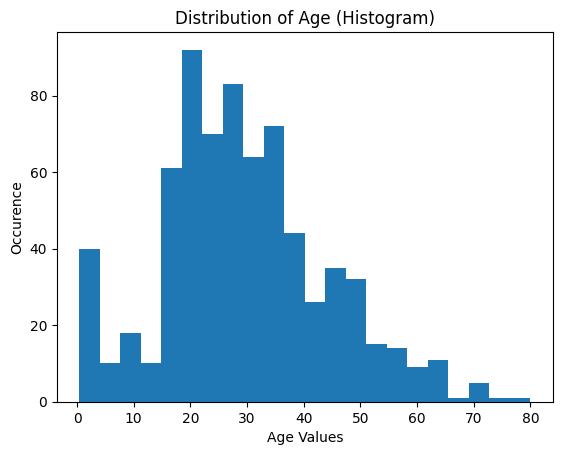

In [166]:
#Now we can create a histogram of age feature. Using matplotlib
plt.hist(df_age_nnull['Age'],bins=bin_number)
plt.xlabel("Age Values")
plt.ylabel("Occurence")
plt.title("Distribution of Age (Histogram)")
plt.show()

Age that occurred most in distribution :  24.81386934673367


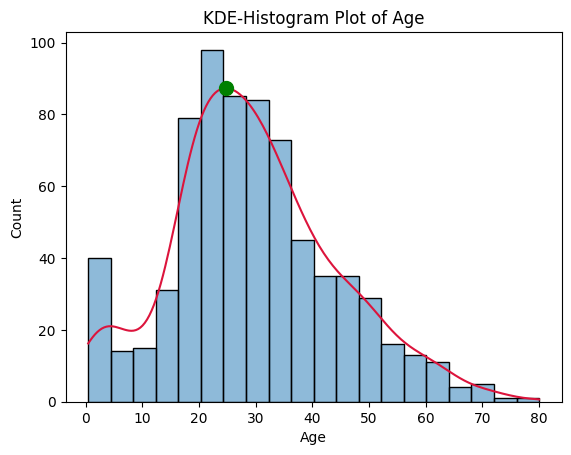

In [167]:
# Plotting KDE plot of age feature. Using seaborn
ax = sns.histplot(data=df_age_nnull,x='Age',kde=True)
plt.title('KDE-Histogram Plot of Age')
ax.lines[0].set_color('crimson')

x_kde = ax.lines[0].get_xdata() 
y_kde = ax.lines[0].get_ydata() 
maxOccured = np.argmax(y_kde) # The id of the max occurred age

plt.plot(x_kde[maxOccured],y_kde[maxOccured],'go',ms=10)
ax.plot()

print("Age that occurred most in distribution : ",x_kde[maxOccured])

### Steps
* First I've checked whether age feature has null values.
* There exists entries that doesn't include age information , so I've created a new sub df which only includes non-empty age valued entries.
* Then I've calculated bin number by using Sturges' Rule.
* Finally I've plotted both histogram and kde distribution plots.

### Findings
* Graph of the age distribution is not symmetrical.
* The graph is right skewed so we can say that mode is greater than the mean.
* By histogram , passengers with age between 20-24 occurs the most in the dataset.
* By kde plot , passengers with age 25 (rounded from 24.814) occured most in the distribution.


## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

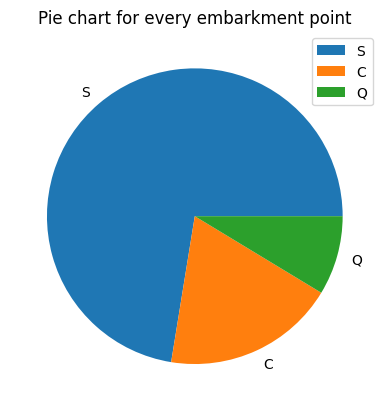

In [168]:
#Plotting the pie chart for embarkment points.
plt.pie(raw_data['Embarked'].value_counts(),labels=raw_data['Embarked'].value_counts().index)
plt.title("Pie chart for every embarkment point")
plt.legend()
plt.show()

In [169]:
# As seen above we can clearly see that most of the passengers has boarded from 'S' embarkment point.
# Let's create a sub df which includes age,sex features of passengers who boarded from 'S'.

df_age_sex=raw_data.loc[(raw_data['Embarked']=='S') & (raw_data['Age'].notnull()) & (raw_data['Sex'].notnull())][['PassengerId','Sex','Age']]
df_age_sex.head()


,PassengerId,Sex,Age
0,1,male,22.0
2,3,female,26.0
3,4,female,35.0
4,5,male,35.0
6,7,male,54.0


In [170]:
print(df_age_sex['Sex'].value_counts())

print(" Female percentage : ",df_age_sex['Sex'].value_counts()[1]/(df_age_sex['Sex'].value_counts()[0]+df_age_sex['Sex'].value_counts()[1]))

male      368
female    186
Name: Sex, dtype: int64
 Female percentage :  0.33574007220216606


<AxesSubplot: xlabel='Age', ylabel='Count'>

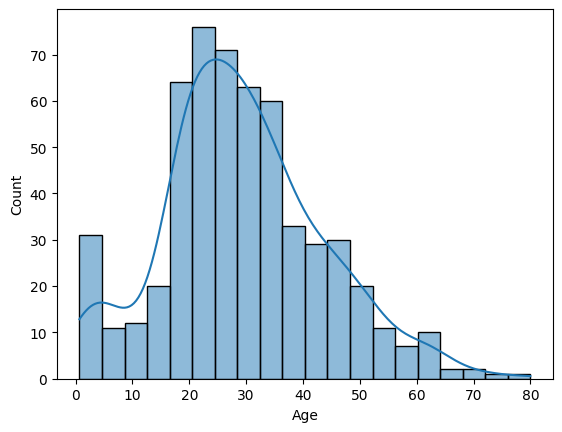

In [171]:
sns.histplot(data=df_age_sex,x='Age',kde=True)

### Findings
* When we plot a distribution graph (kde,histogram) for Age and Sex, we can not say that this embarkment point has implied the 'Women and Children First' policy.
* Because in the age distribution , passengers whose age is smaller than 18 do not place the majority of passengers compared to the passengers whose age is between 20 - 40 .
* However we can say that passengers whose age are smaller than 4(babies-children) has a significant frequency compared to the middle aged(40-60) and elder people(>60).
* Furthermore when we check the distribution of male and female passengers boarded, we can see females hold %33.56 of total embarkments from S. This doesn't imply our policy neither.

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

In [172]:
print("Count of null values in feature Age : ",len(raw_data.loc[raw_data['Age'].isnull()]))
print("Count of na values in feature Age :  ",len(raw_data.loc[raw_data['Age'].isna()]))
print("Count of null values in feature Fare : ",len(raw_data.loc[raw_data['Fare'].isnull()]))
print("Count of na values in feature Fare :  ",len(raw_data.loc[raw_data['Fare'].isna()]))

print("\n We need to create a new sub df which doesn't include any empty entries in Age and Fare feature.")

Count of null values in feature Age :  177
Count of na values in feature Age :   177
Count of null values in feature Fare :  0
Count of na values in feature Fare :   0

 We need to create a new sub df which doesn't include any empty entries in Age and Fare feature.


In [173]:
df_age_fare=raw_data.loc[(raw_data['Age'].isnull()==False)][['Age','Fare']]

<AxesSubplot: xlabel='Age', ylabel='Fare'>

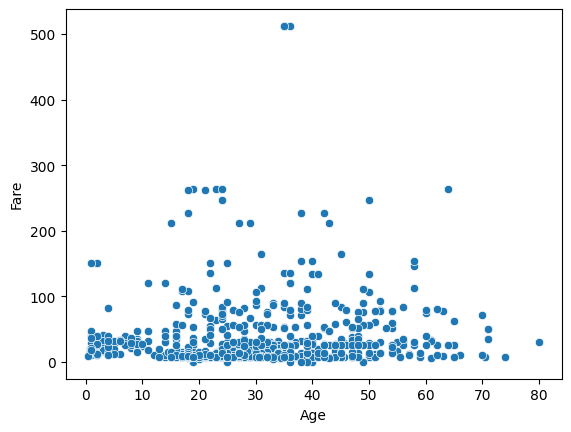

In [174]:
# Now we will plot a scatter plot for Age-Fare.
sns.scatterplot(df_age_fare,x='Age',y='Fare')
#Here is the code for plotting a regression plot -> sns.regplot(df_age_fare,x='Age',y='Fare',color='crimson')

In [175]:
print(df_age_fare.corr())

print(''' 

      As we can see from the scatter plot and correlation matrix , there is no strong connection between Age and Fare features.
      We will check the correlation once more after we clean the data from outliers.
       ''')

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000
 

      As we can see from the scatter plot and correlation matrix , there is no strong connection between Age and Fare features.
      We will check the correlation once more after we clean the data from outliers.
       


[]

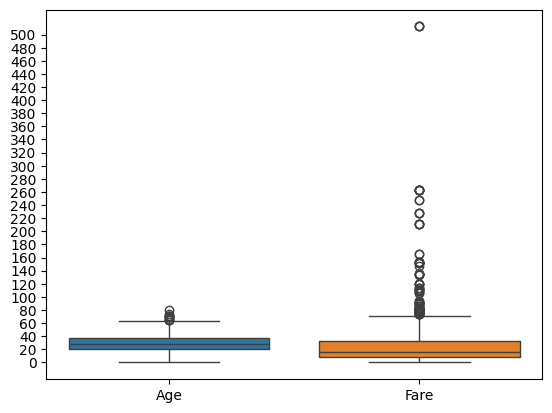

In [176]:
#As seen above there is no obvious pattern in this data, because outlier values of Fare makes it hard to explain the data.
#So we will detect outliers in Fare and drop them from our sub df.
#To detect outliers, we will use boxplot.

fx=sns.boxplot(data=df_age_fare)
fx.set_yticks(np.arange(0,np.max(df_age_fare['Fare']),20))
fx.plot()

In [177]:
#We can see that above 100 , Fare values are outliers.
#We will drop every instance in our subgraph which has Fare>=80.
df_age_fare=df_age_fare.loc[df_age_fare['Fare']<=80]

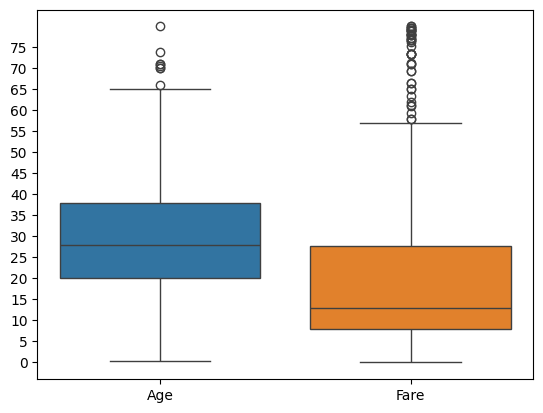

In [178]:
fx=sns.boxplot(data=df_age_fare)
fx.set_yticks(np.arange(0,np.max(df_age_fare['Fare']),5))
fx.plot()

#We can see that above 65 , Age values are outliers.
#We will drop every instance in our subgraph which has Age>=65.
df_age_fare=df_age_fare.loc[df_age_fare['Age']<=65]

<AxesSubplot: xlabel='Age', ylabel='Fare'>

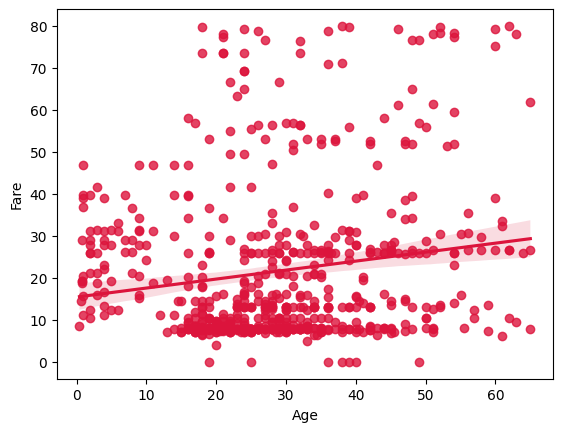

In [179]:
# Plotting a regression plot for Age-Fare.
sns.regplot(df_age_fare,x='Age',y='Fare',color='crimson')

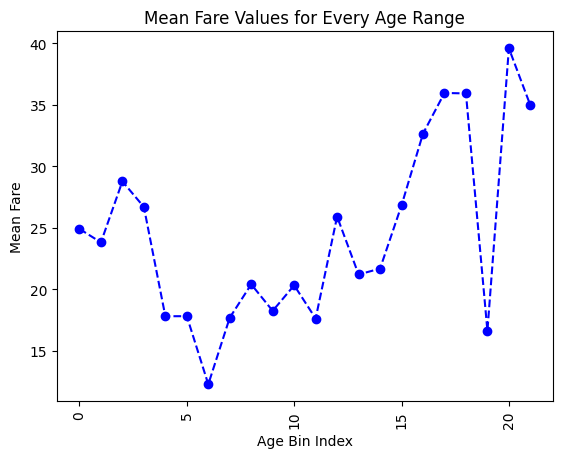

In [180]:
# I have created a new feature which holds the age range of every passenger.
# I have calculated mean Fare for every age bin.

df_age_fare['Age Range']=pd.cut(df_age_fare['Age'],bins=bin_number,include_lowest=True).cat.codes
plt.plot(df_age_fare.groupby('Age Range').mean()['Fare'],'bo--')
plt.xlabel('Age Bin Index')
plt.ylabel('Mean Fare')
plt.xticks(rotation=90)
plt.title('Mean Fare Values for Every Age Range')
plt.show()

In [181]:
print(df_age_fare.corr())

print(''' 

      After outlier dropping process ,we can see that the correlation has increased from 0.09 to 0.16.
      However when I check the scatter plots and regression plots, I still can not observe a solid correlation. 
       ''')

                Age      Fare  Age Range
Age        1.000000  0.160594   0.998013
Fare       0.160594  1.000000   0.162278
Age Range  0.998013  0.162278   1.000000
 

      After outlier dropping process ,we can see that the correlation has increased from 0.09 to 0.16.
      However when I check the scatter plots and regression plots, I still can not observe a solid correlation. 
       


### Steps
* First , I've checked if there exist any correlation between Fare - Age in the **raw** data.
* I've checked the correlation matrix and couldn't find a correlation again.
* Then , I've cleaned the data from **outliers**.
* After these I couldn't find any observable correlation by plotting regplot,scatter plot etc.
* I tried binning age feature and plotting the mean values for every bins. This graph was the easiest to read and comment, unfortunately I couldn't find a strong correlation again.
* Lastly I've checked the correlation matrix of the data (which doesn't include outliers). The correlation between Fare-Age has increased but still this doesn't prove that they affect each other tightly.

Finding : *There is no strong relation between Age - Fare features!*

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


In [182]:
# Let's create a sub df that contains Embarked,Pclass and Fare values.
df_epf=raw_data[['Embarked','Pclass','Fare']]

print("Count of null values in feature Embarked : ",len(raw_data.loc[raw_data['Embarked'].isnull()]))
print("Count of na values in feature Embarked :  ",len(raw_data.loc[raw_data['Embarked'].isna()]))
print("Count of null values in feature Fare : ",len(raw_data.loc[raw_data['Fare'].isnull()]))
print("Count of na values in feature Fare :  ",len(raw_data.loc[raw_data['Fare'].isna()]))
print("Count of null values in feature Pclass : ",len(raw_data.loc[raw_data['Pclass'].isnull()]))
print("Count of na values in feature Pclass :  ",len(raw_data.loc[raw_data['Pclass'].isna()]))


Count of null values in feature Embarked :  2
Count of na values in feature Embarked :   2
Count of null values in feature Fare :  0
Count of na values in feature Fare :   0
Count of null values in feature Pclass :  0
Count of na values in feature Pclass :   0


In [186]:
#Dropping entries which has null values in the Embarked feature. (Count:2)
df_epf = df_epf.loc[df_epf['Embarked'].notnull()]
df_epf.head()

,Embarked,Pclass,Fare
0,S,3,7.2500
1,C,1,71.2833
2,S,3,7.9250
3,S,1,53.1000
4,S,3,8.0500


In [189]:
# Grouping the df by Embarked and Pclass , using the aggregate function mean()
df_epf_grouped=df_epf.groupby(by=['Embarked','Pclass'],sort=True).mean()
df_epf_grouped

Fare
Embarked Pclass            
C        1       104.718529
         2        25.358335
         3        11.214083
Q        1        90.000000
         2        12.350000
         3        11.183393
S        1        70.364862
         2        20.327439
         3        14.644083

array([<AxesSubplot: title={'center': 'Fare'}, xlabel='Embarked,Pclass'>],
      dtype=object)

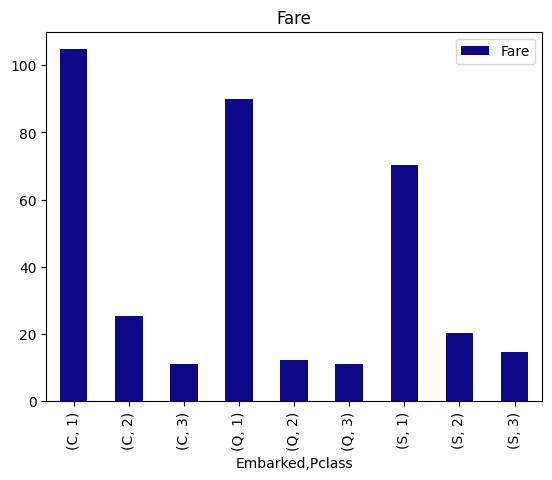

In [196]:
df_epf_grouped.plot(kind="bar",colormap="plasma",subplots=True)

### Findings
* When we look at the bar plot above , we can conclude that there is a negative correlation between Pclass-Fare.
* We can not say the same thing with Embarked-Fare.
* The most efficient way to buy tickets for every Pclass is :
1. Pclass=1 -> Embarked=S
2. Pclass=2 -> Embarked=Q
3. Pclass=3 -> Embarked=Q

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
